<a href="https://colab.research.google.com/github/MasumRaj479/AI-based-Precision-Farming/blob/main/griding(mosaic_of_images)_and_dronelawnmover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_folder = "/content/drive/MyDrive/nit patna images"


Row 1 shape: (224, 1344, 3)
Row 2 shape: (224, 1344, 3)
Row 3 shape: (224, 1344, 3)
Row 4 shape: (224, 1344, 3)
Row 5 shape: (224, 1344, 3)
Row 6 shape: (224, 1344, 3)
Row 7 shape: (224, 1344, 3)
Row 8 shape: (224, 1344, 3)
Row 9 shape: (224, 1344, 3)
Row 10 shape: (224, 1344, 3)


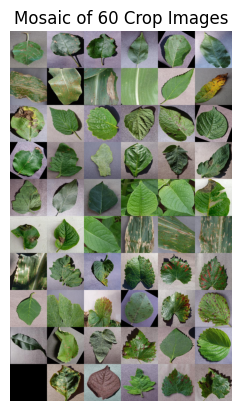

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

rows, cols = 10,6
img_h, img_w = 224, 224
image_folder = "/content/drive/MyDrive/nit patna images"

images = []
loaded_images_count = 0
for i in range(1, rows * cols + 1):
    img_path = os.path.join(image_folder, f"image_{i}.jpg")
    img = cv2.imread(img_path)
    if img is not None: # Check if the image was loaded successfully
        img = cv2.resize(img, (img_w, img_h))
        images.append(img)
        loaded_images_count += 1
    else:
        print(f"Warning: Could not load image {img_path}. Using placeholder.")
        # Add a placeholder for the missing image to maintain grid structure
        images.append(np.zeros((img_h, img_w, 3), dtype=np.uint8))


# Convert into grid (mosaic)
grid = []
if images: # Check if the images list is not empty
    for i in range(rows):
        row_imgs = images[i * cols:(i + 1) * cols]
        if len(row_imgs) == cols: # Ensure the row has the correct number of images
            # Before stacking, check dimensions of each image in the row
            valid_row = True
            for img in row_imgs:
                if img.shape != (img_h, img_w, 3):
                    print(f"Error: Image in row {i+1} has incorrect dimensions: {img.shape}")
                    valid_row = False
                    break # Exit the inner loop if an invalid image is found
            if valid_row:
                try:
                    row = np.hstack(row_imgs)
                    grid.append(row)
                    print(f"Row {i+1} shape: {row.shape}") # Debug print
                except ValueError as e:
                    print(f"Error stacking row {i+1}: {e}")
            else:
                print(f"Skipping row {i+1} due to invalid image dimensions.")
        else:
            print(f"Warning: Row {i+1} has an incorrect number of images ({len(row_imgs)} instead of {cols}). Skipping row.")


# Check if there are any valid rows to stack
if grid:
    try:
        mosaic = np.vstack(grid)
        cv2.imwrite("field_mosaic.jpg", mosaic)

        # Show result
        plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
        plt.title(f"Mosaic of {len(grid) * cols} Crop Images")
        plt.axis('off')
        plt.show()
    except ValueError as e:
        print(f"Error stacking grid into mosaic: {e}")
else:
    print("No valid rows created to form a mosaic.")

In [ ]:
base_lat = 27.2046
base_lon = 77.4977
lat_step = 0.00001  # ~1.11 meters
lon_step = 0.00001

image_gps_data = []
for i in range(rows):
    for j in range(cols):
        img_name = f"image_{i * cols + j + 1}.jpg"
        lat = base_lat + i * lat_step
        lon = base_lon + j * lon_step
        image_gps_data.append((img_name, lat, lon))


In [ ]:
# Creating location_map from image_gps_data
location_map = {}
for idx, (img_name, lat, lon) in enumerate(image_gps_data):
    row_idx = idx // cols
    col_idx = idx % cols
    location_map[img_name] = {
        "filename": img_name,
        "grid": (row_idx, col_idx),
        "location": (lat, lon)
    }



In [ ]:
# Show location mapping
for k, v in location_map.items():
    print(f"{v['filename']} → Grid: {v['grid']} → Location: {v['location']}")


image_1.jpg → Grid: (0, 0) → Location: (27.2046, 77.4977)
image_2.jpg → Grid: (0, 1) → Location: (27.2046, 77.49771)
image_3.jpg → Grid: (0, 2) → Location: (27.2046, 77.49772)
image_4.jpg → Grid: (0, 3) → Location: (27.2046, 77.49772999999999)
image_5.jpg → Grid: (0, 4) → Location: (27.2046, 77.49774)
image_6.jpg → Grid: (0, 5) → Location: (27.2046, 77.49775)
image_7.jpg → Grid: (1, 0) → Location: (27.20461, 77.4977)
image_8.jpg → Grid: (1, 1) → Location: (27.20461, 77.49771)
image_9.jpg → Grid: (1, 2) → Location: (27.20461, 77.49772)
image_10.jpg → Grid: (1, 3) → Location: (27.20461, 77.49772999999999)
image_11.jpg → Grid: (1, 4) → Location: (27.20461, 77.49774)
image_12.jpg → Grid: (1, 5) → Location: (27.20461, 77.49775)
image_13.jpg → Grid: (2, 0) → Location: (27.20462, 77.4977)
image_14.jpg → Grid: (2, 1) → Location: (27.20462, 77.49771)
image_15.jpg → Grid: (2, 2) → Location: (27.20462, 77.49772)
image_16.jpg → Grid: (2, 3) → Location: (27.20462, 77.49772999999999)
image_17.jpg → 

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(location_map, orient='index')
df.to_csv("mosaic_location_mapping.csv", index=False)
print("CSV file saved: mosaic_location_mapping.csv")


CSV file saved: mosaic_location_mapping.csv


In [ ]:
df.to_csv("mosaic_location_mapping.csv", index=False)


In [ ]:
from google.colab import files
files.download("mosaic_location_mapping.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

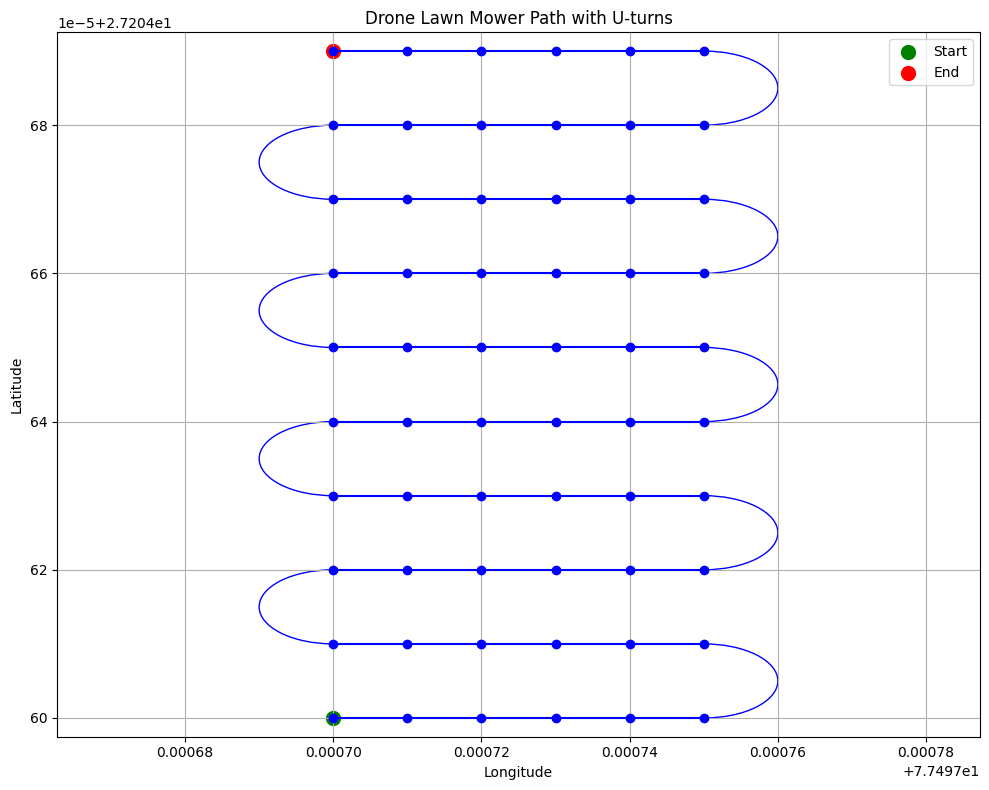

In [ ]:
from matplotlib.patches import Arc
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(rows):
    row_positions = []
    for j in range(cols):
        lat = base_lat + i * lat_step
        if i % 2 == 0:
            lon = base_lon + j * lon_step
        else:
            lon = base_lon + (cols - 1 - j) * lon_step
        row_positions.append((lon, lat))

    lons, lats = zip(*row_positions)
    ax.plot(lons, lats, 'b-o')

    # U-Turn Arc
    if i < rows - 1:
        next_lat = base_lat + (i + 1) * lat_step
        arc_center_lat = (lat + next_lat) / 2
        if i % 2 == 0:
            arc_center_lon = base_lon + (cols - 1) * lon_step
            arc = Arc((arc_center_lon, arc_center_lat),
                      width=lon_step * 2,
                      height=lat_step,
                      theta1=270, theta2=90,
                      color='blue')
        else:
            arc_center_lon = base_lon
            arc = Arc((arc_center_lon, arc_center_lat),
                      width=lon_step * 2,
                      height=lat_step,
                      theta1=90, theta2=270,
                      color='blue')
        ax.add_patch(arc)

# Mark start and end
ax.scatter(base_lon, base_lat, color='green', s=100, label="Start")
# The variables 'lon' and 'lat' here will be the last calculated position in the loop, which is the end of the path.
ax.scatter(lon, lat, color='red', s=100, label="End")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Drone Lawn Mower Path with U-turns")
ax.grid(True)
ax.legend()
plt.axis('equal')
plt.tight_layout()
plt.savefig("drone_path_with_arcs.png")
plt.show()